Training samples: 2880
Testing samples: 394
OK
Epoch 1/20
81/81 [==============================] - 26s 247ms/step - loss: 1.3634 - accuracy: 0.2990 - val_loss: 1.3470 - val_accuracy: 0.2882
Epoch 2/20
81/81 [==============================] - 20s 244ms/step - loss: 1.3544 - accuracy: 0.2932 - val_loss: 1.3484 - val_accuracy: 0.2917
Epoch 3/20
81/81 [==============================] - 20s 242ms/step - loss: 1.3485 - accuracy: 0.2913 - val_loss: 1.3443 - val_accuracy: 0.2882
Epoch 4/20
81/81 [==============================] - 20s 243ms/step - loss: 1.3524 - accuracy: 0.2917 - val_loss: 1.3459 - val_accuracy: 0.2917
Epoch 5/20
81/81 [==============================] - 19s 239ms/step - loss: 1.2895 - accuracy: 0.3792 - val_loss: 1.3229 - val_accuracy: 0.3125
Epoch 6/20
81/81 [==============================] - 20s 241ms/step - loss: 0.8930 - accuracy: 0.6292 - val_loss: 0.7398 - val_accuracy: 0.6285
Epoch 7/20
81/81 [==============================] - 20s 243ms/step - loss: 0.6890 - accuracy: 0

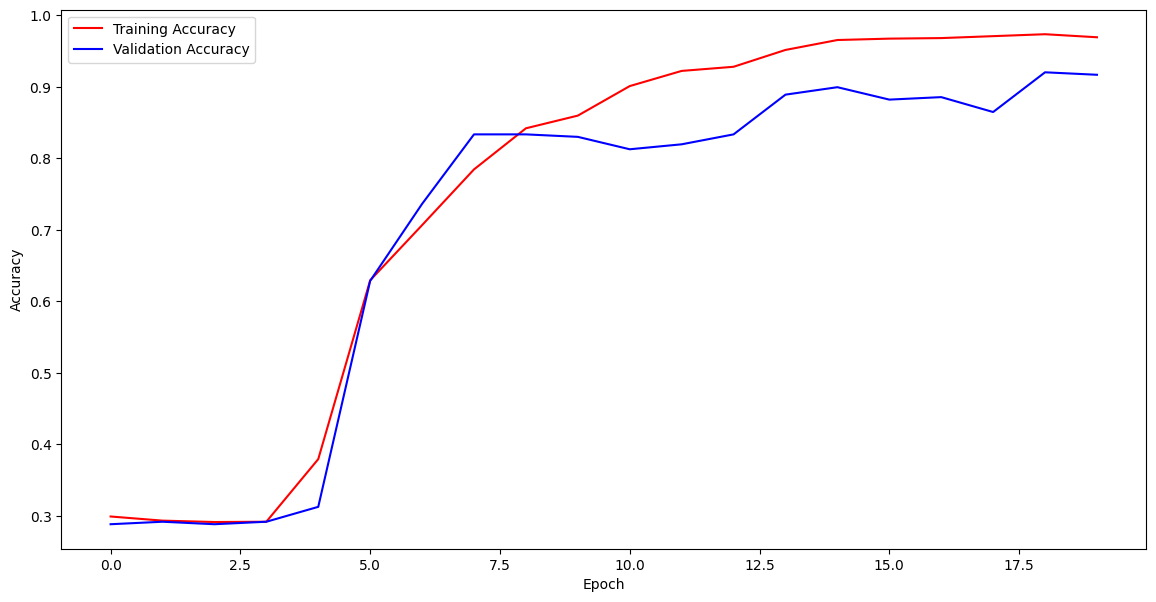

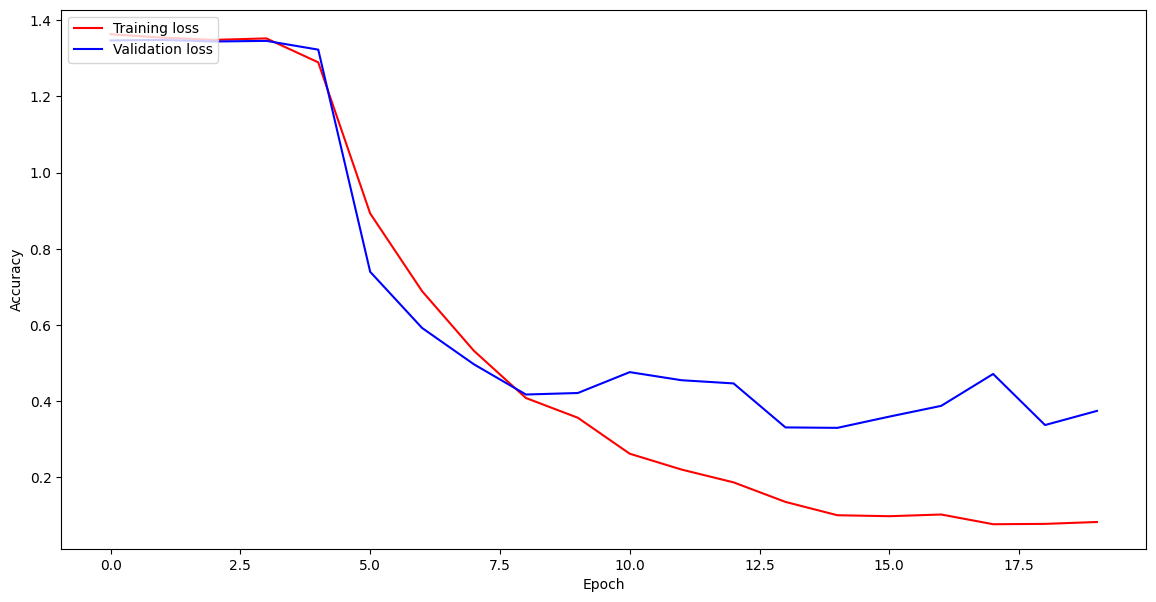

In [3]:
import random as rn
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, concatenate, MaxPooling2D, GlobalAveragePooling2D
import pathlib
import cv2
from tqdm import tqdm
import os
from os import listdir
from os.path import join
import pandas
from sklearn.model_selection import train_test_split
from sklearn.metrics import *


np.random.seed(42)

# hyper-parameters
batch_size = 32

# categories of images
num_classes = 4

# number of training epochs
epochs = 20

IMG_SIZE = 224
# 128 / 160 / 180 / 512



def load_data2():
    """This function loads dataset, normalized, and labels one-hot encoded"""
    train_data_dir = pathlib.Path('/content/drive/MyDrive/AI_project/Brian_tumor/Training')
    test_data_dir = pathlib.Path('/content/drive/MyDrive/AI_project/Brian_tumor/Testing')    
    train_folders = os.listdir(train_data_dir)
    test_folders = os.listdir(test_data_dir)

    train_image_names = []
    test_image_names = []
    train_labels = []
    train_images = []
    test_labels = []
    test_images = []

    size = 224, 224
   

    for i, folder in enumerate(train_folders):
      for file in os.listdir(os.path.join(train_data_dir,folder)):
        if file.endswith("jpg"):
            train_image_names.append(file)
            if folder == 'glioma_tumor':
                train_labels.append(0)
            elif folder == 'meningioma_tumor':
                train_labels.append(1)
            elif folder == 'no_tumor':
                train_labels.append(2)
            elif folder == 'pituitary_tumor':
                train_labels.append(3)
            img = cv2.imread(os.path.join(train_data_dir,folder,file))
            im = cv2.resize(img,size)
            train_images.append(im)
        else:
            continue


    for i, folder in enumerate(test_folders):
      for file in os.listdir(os.path.join(test_data_dir,folder)):
        if file.endswith("jpg"):
            test_image_names.append(file)
            if folder == 'glioma_tumor':
                test_labels.append(0)
            elif folder == 'meningioma_tumor':
                test_labels.append(1)
            elif folder == 'no_tumor':
                test_labels.append(2)
            elif folder == 'pituitary_tumor':
                test_labels.append(3)
            img = cv2.imread(os.path.join(test_data_dir,folder,file))
            im = cv2.resize(img,size)
            test_images.append(im)
        else:
            continue

    X_train = np.array(train_images)
    X_test = np.array(test_images)
 
    print("Training samples:", X_train.shape[0])
    print("Testing samples:", X_test.shape[0])
    
    X_train = X_train.astype("float32")
    X_test = X_test.astype("float32")
    X_train /= 255
    X_test /= 255

    train_label_dummies = pandas.get_dummies(train_labels)
    test_label_dummies = pandas.get_dummies(test_labels)

    trainlabels = train_label_dummies.values.argmax(1)
    testlabels = test_label_dummies.values.argmax(1)

    X_train = np.array(X_train)
    y_train = np.array(trainlabels)

    X_test = np.array(X_test)
    y_test = np.array(testlabels)

    print('OK')
    return(X_train, y_train),(X_test, y_test), (train_image_names, test_image_names)


def create_CNN_model():
  model = Sequential()
  model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(224, 224, 3)))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.3))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(Conv2D(64,(3,3),activation='relu'))
  model.add(Dropout(0.3))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.3))
  model.add(Conv2D(128,(3,3),activation='relu'))
  model.add(Conv2D(128,(3,3),activation='relu'))
  model.add(Conv2D(128,(3,3),activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.3))
  model.add(Conv2D(128,(3,3),activation='relu'))
  model.add(Conv2D(256,(3,3),activation='relu'))
  model.add(MaxPooling2D(2,2))
  model.add(Dropout(0.3))
  model.add(Flatten())
  model.add(Dense(512,activation = 'relu'))
  model.add(Dense(512,activation = 'relu'))
  model.add(Dropout(0.3))
  model.add(Dense(4,activation='softmax'))
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  
  return model
  

if __name__ == "__main__":
    # load the data
    (X_train, y_train), (X_test, y_test), (train_image_names, test_image_names) = load_data2()
	
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.1, random_state=1)
    
    # construct the model
    model = create_CNN_model()
    
    # train
    history=model.fit(X_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(X_val, y_val))


# test item prediction
testLabelPredicted = model.predict(X_test)
testLabelPredicted = np.rint(testLabelPredicted.argmax(axis=-1))
testLabelGold = y_test
#print(testLabelGold)


# Evaluation
results = confusion_matrix(testLabelGold, testLabelPredicted) 
    
print ('Confusion Matrix :')
print (results) 

print ('Recall Score :',recall_score(testLabelGold, testLabelPredicted, average='micro'))
print ('Precision Score :',precision_score(testLabelGold, testLabelPredicted, average='micro'))
print ('F1 Score :',f1_score(testLabelGold, testLabelPredicted, average='micro'))
print ('Accuracy :',accuracy_score(testLabelGold, testLabelPredicted))

import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img = cv2.imread('/content/drive/MyDrive/AI_project/Brian_tumor/Testing/meningioma_tumor/image(102).jpg')
img = cv2.resize(img,(224,224))
img_array = np.array(img)
img_array.shape



(224, 224, 3)

In [ ]:
img_array=img_array.reshape(1,224,224,3)
img_array.shape

(1, 224, 224, 3)

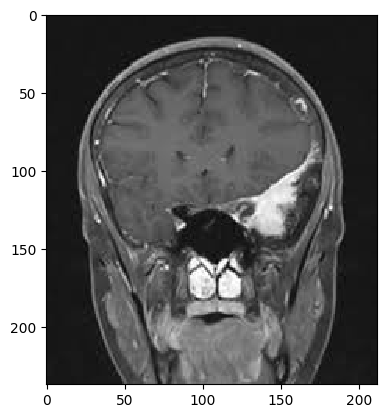

In [ ]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/AI_project/Brian_tumor/Testing/meningioma_tumor/image(102).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
a=model.predict(img_array)
index = a.argmax()
index
if index==0:
  print("Glioma_tumor")
elif index==1:
  print("Meningioma_tumor")
elif index==2:
  print("No Tumor")
elif index==3:
  print("Pituitary_tumor")

1/1 [==============================] - 0s 19ms/step
Meningioma_tumor
